<a href="https://colab.research.google.com/github/carneiro-fernando/EBAC/blob/main/Desafio_Lighthouse_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Cientista de Dados - Indicium

<div style="align-items: center; justify-content: space-between;">
   <img src="https://datanauta.indicium.tech/_next/static/media/company_logo_vertical.c32cb333.png"  align="right" alt="Semantix-logo" width="15%">
   <b> por <a href="https://www.linkedin.com/in/fernandohcarneiro/">Fernando Carneiro</a> </b>
</div>

---

## Sumário
1. [**Introdução**](#intro)
2. [**Análise Exploratória dos Dados**](#da)
3. [**Aprendizado de Máquina**](#ml)
4. [**Conclusão**](#conclusion)



<a id='intro'></a>
## 1. Introdução

Projeto para teste de meus conhecimentos em conceitos estatísticos de modelos preditivos, criatividade na resolução de problemas e aplicação de modelos básicos de machine learning. Fazem parte do processo seletivo do programa Lighthouse da [Indicium](https://www.indicium.tech/).

O desafio:

> "Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.
> Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema."

### **1.1 Bibliotecas**

In [ ]:
# Importação de pacotes
import os
import warnings

import numpy as np
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Desabilitar todos os avisos
warnings.filterwarnings("ignore")

###**1.2 Importação dos Dados**

In [ ]:
%%capture

file_path_csv = "/content/teste_indicium_precificacao.csv"
file_path_shp = "/content/nyc.shp"
file_path_shx = "/content/nyc.shx"

# Baixar os arquivos caso eles não existam
if not os.path.exists(file_path_csv):
    !wget https://raw.githubusercontent.com/carneiro-fernando/lighthouse/main/datasource/teste_indicium_precificacao.csv

if not os.path.exists(file_path_shp):
    !wget https://github.com/carneiro-fernando/lighthouse/raw/main/datasource/nyc.shp

if not os.path.exists(file_path_shx):
    !wget https://github.com/carneiro-fernando/lighthouse/raw/main/datasource/nyc.shx

In [ ]:
# Leitura do arquivo CSV e criação do DataFrame
df = pd.read_csv(file_path_csv)


###**1.3 Descrição dos Dados** (*schema*)

Abaixo segue uma tabela com a descrição de cada uma das colunas do DataFrame:


| **Coluna** | **Nome**                   | **Descrição**                                                                      |
|------------|------------------------------|------------------------------------------------------------------------------------|
| 1          | id                           | Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo            |
| 2          | nome                         | Representa o nome do anúncio                                                      |
| 3          | host_id                      | Representa o id do usuário que hospedou o anúncio                                 |
| 4          | host_name                    | Contém o nome do usuário que hospedou o anúncio                                   |
| 5          | bairro_group                 | Contém o nome do bairro onde o anúncio está localizado                           |
| 6          | bairro                       | Contém o nome da área onde o anúncio está localizado                              |
| 7          | latitude                     | Contém a latitude do local                                                        |
| 8          | longitude                    | Contém a longitude do local                                                       |
| 9          | room_type                    | Contém o tipo de espaço de cada anúncio                                           |
| 10         | price                        | Contém o preço por noite em dólares listado pelo anfitrião                        |
| 11         | minimo_noites                | Contém o número mínimo de noites que o usuário deve reservar                      |
| 12         | numero_de_reviews            | Contém o número de comentários dados a cada listagem                               |
| 13         | ultima_review                | Contém a data da última revisão dada à listagem                                    |
| 14         | reviews_por_mes              | Contém o número de avaliações fornecidas por mês                                   |
| 15         | calculado_host_listings_count| Contém a quantidade de listagem por host                                           |
| 16         | disponibilidade_365         | Contém o número de dias em que o anúncio está disponível para reserva             |


Verificação do *schema*

In [ ]:
df.dtypes

id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

In [ ]:
print(f'Esses são os tipos de dados presentes: {df.dtypes.unique()}')


Esses são os tipos de dados presentes: [dtype('int64') dtype('O') dtype('float64')]


<a id='da'></a>
## 2. Análise Exploratória dos Dados

###**2.1 Wrangling**

Checando o número de linhas e colunas que estão presentes no DataFrame criado:

In [ ]:
shape = df.shape
print(f"O DataFrame tem {shape[1]} colunas e {shape[0]} linhas.")

O DataFrame tem 16 colunas e 48894 linhas.


Investigação se há dados nulos presentes:

In [ ]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Analisando as linhas nulas:

In [ ]:
df[df.isnull().any(axis=1)]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
18,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
25,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
35,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
37,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Perceba que a maioria dos dados nulos são referentes à colunas de avaliação (*review* ) da propriedade. Temos três opções:

*   Excluir todas as linhas com valores nulos.
*   Preencher esses valores com uma média ou técnica estatística.
*   Preencher esses valores com zero.

A opção mais apropriada é o preenchimento com o número **zero**, pois reflete com maior precisão a verdadeira condição do dados. Isso porque a coluna *numero_de_reviews* deixa claro que os dados nulos são devido à ausência de avaliação, que corresponde corretamente à quantidade zero, essa informação está correta e não há impacto negativo na análise.



Limpeza dos dados das colunas de *reviews*.

In [ ]:
df[['ultima_review', 'reviews_por_mes']] = df[['ultima_review', 'reviews_por_mes']].fillna(0)

Conferir se a limpeza foi bem sucedida e analisar os outros dados nulos:

In [ ]:
df.isnull().sum()

id                                0
nome                             16
host_id                           0
host_name                        21
bairro_group                      0
bairro                            0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimo_noites                     0
numero_de_reviews                 0
ultima_review                     0
reviews_por_mes                   0
calculado_host_listings_count     0
disponibilidade_365               0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
359,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2699,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
2853,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0,0.00,1,362
3702,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5744,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
5774,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5974,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6074,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,0,0.00,1,0
6268,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,0,0.00,1,0
6566,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,0,0.00,1,0


Os valores nulos se referem agora ao nome do anúncio e ao nome do usuário responsável pelo anúncio. Referente ao nome do usuário, faremos o seguinte tratamento: reuniremos os *ids* deles e buscaremos no restante do DataFrame se há alguma linha em que se repita esse *id* e tenha o nome do usuário.

In [ ]:
#  Criando DataFrame com os nomes nulos:
null_host_names = df[df['host_name'].isnull()]['host_name']

# Criando DataFrame com os ids dos usuário com nome nulo:
host_ids = df[df['host_name'].isin(null_host_names)]['host_id']

# Buscando no DataFrame pelos nomes referentes aos ids:
df[df['host_id'].isin(host_ids)]

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
359,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2699,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5744,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6074,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,0,0.00,1,0
6581,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8162,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8256,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8851,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9137,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,0,0.00,1,0
9816,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


Infelizmente, não há nenhuma outra menção dos *host_id* ligados aos *host_names* nulos. Sendo assim, por se tratar de uma quantidade pequena de dados, irei apenas remover as linhas com esses valores nulos, juntamente com as linhas em que o título do anúncio é nulo.

In [ ]:
# Removendo todos os valores nulos
df = df.dropna()

# Checando se todos os valores foram removidos
df.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

###**2.2 Análise dos dados**

####2.2.1 Dados categóricos

Vamos ter uma visão geral dos nossos dados, começando pelos dados categóricos.

In [ ]:
df.select_dtypes("object").describe().transpose()

,count,unique,top,freq
nome,48857,47883,Hillside Hotel,18
host_name,48857,11450,Michael,417
bairro_group,48857,5,Manhattan,21643
bairro,48857,221,Williamsburg,3917
room_type,48857,3,Entire home/apt,25393
ultima_review,48857,1765,0,10037


Vamos analisar brevemente os dados únicos com menor ocorrência:


In [ ]:
print(f"Tipos de quarto: {df['room_type'].unique()} \n\
        Bairros: {df['bairro_group'].unique()}")

Tipos de quarto: ['Entire home/apt' 'Private room' 'Shared room'] 
        Bairros: ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']


**Insights:**

* É possível observar nos dados referentes aos bairros que os dados do concorrente estão corretamente direcionados somente à cidade de Nova York, que é o maior interesse de nosso cliente.

* A quantidade de valores únicos na coluna é alta, cerca de 1000 resultados são repetidos, como por exemplo a rede (*chain*) de hotéis *Hillside Hotel* que se repete 18 vezes. Isso indica que nossos dados se tratam majoritariamente de aluguéis por aplicativo (ex: Airbnb, Vrbo, Wimdu), outra evidência são os tipos de quartos que não são opções comuns em redes de hotéis.

* Segue uma tabela para facilitar a visualização dos valores mais populares:

>| Mais popular | Valor |
|---|---|
| Anúncio | Hillside Hotel |
| Anfitrião | Michael |
| Bairro | Manhattan |
| Área | Williamsburg |
| Tipo de quarto | Casa/apartamento inteiro |
| Comodidadeses | Wifi, cozinha, itens essenciais, aquecimento, ar condicionado |


####**2.2.2 Dados numéricos**

In [ ]:
num_data_df = df.select_dtypes(["int64","float64"]).drop(['id', 'host_id', 'latitude', 'longitude'], axis=1)
num_data_df.describe().T # T e transpose() são métodos idênticos

,count,mean,std,min,25%,50%,75%,max
price,48857.0,152.740385,240.234843,0.0,69.00,106.00,175.00,10000.0
minimo_noites,48857.0,7.012567,20.019944,1.0,1.00,3.00,5.00,1250.0
numero_de_reviews,48857.0,23.273390,44.550307,0.0,1.00,5.00,24.00,629.0
reviews_por_mes,48857.0,1.091142,1.597281,0.0,0.04,0.37,1.58,58.5
calculado_host_listings_count,48857.0,7.148392,32.964937,1.0,1.00,1.00,2.00,327.0
disponibilidade_365,48857.0,112.796263,131.607363,0.0,0.00,45.00,227.00,365.0


**Insights:**

* Enquanto o desvio padrão é de $240,23, o preço médio é de apenas \$152,74, sugerindo assim, que há uma ampla gama de preços, com alguns anúncios sendo significamente mais caros do que outros.

* O preço mediano é de $106, menor que a média aritmética, sugerindo que os preços tendem a ser em sua maioria numa faixa de preço mais baixa.

* Na coluna *calculado_host_listings_count* existe pelo menos um *outlier*, visto que o terceiro quartil tem como valor 2 mas o número máximo é 327, indicando outliers, já que pelo menos um dos anfitriões tem essa quantidade de propriedades.

* Há algumas discrepâncias nos dados como o número mínimo de noites ser de 1250 noites (3 anos e meio) e o preço mínimo ser de $0,00. Elas podem ser alvo de uma análise posterior.

###**2.3 Visualização dos dados**

#### 2.3.1 Localizações

In [ ]:
map_df = df[['bairro', 'longitude', 'latitude']]
sns.set(context="notebook")

Vamos ver a proporção de propriedades de cada região:

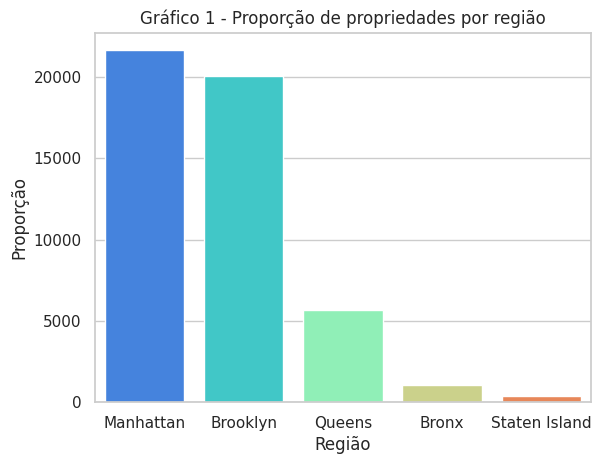

In [ ]:
sns.set(context="notebook")
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(
      x=df['bairro_group'].value_counts().index,
      y=df['bairro_group'].value_counts().values,
      palette='rainbow')
  grafico.set(title='Gráfico 1 - Proporção de propriedades por região',
                xlabel='Região',
                ylabel='Proporção')


*Manhattan* e *Brooklyn* são as regiões com mais propriedades disponíveis pelo concorrente, cerca de 400% em relação à região *Queens* em terceiro lugar.

####2.3.2 Preços

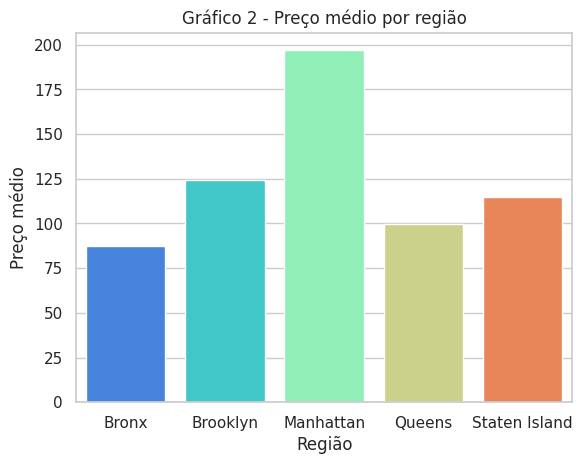

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(
      x=df.groupby('bairro_group')['price'].mean().index,
      y=df.groupby('bairro_group')['price'].mean().values,
      palette='rainbow')
  grafico.set(title='Gráfico 2 - Preço médio por região',
                xlabel='Região',
                ylabel='Preço médio')

*Manhattan* é disparado a região com o maior preço médio, seguido por *Brooklyn* e *Staten Island*.

####2.3.3 Tipos de espaço

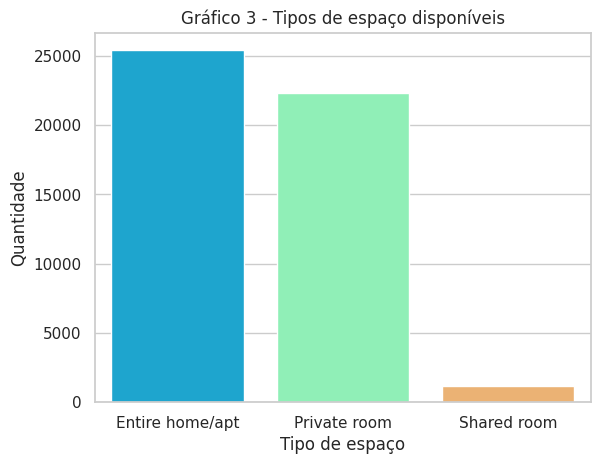

In [ ]:
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(
      x=df['room_type'].value_counts().index,
      y=df['room_type'].value_counts().values,
      palette='rainbow')
  grafico.set(title='Gráfico 3 - Tipos de espaço disponíveis',
                xlabel='Tipo de espaço',
                ylabel='Quantidade')

O concorrente não tem à disposição muitos espaços compartilhados, de fato, são  raros, provavelmente reflete as preferências de consumo em Nova York.

#### 2.3.4 Espaços por anfitrião

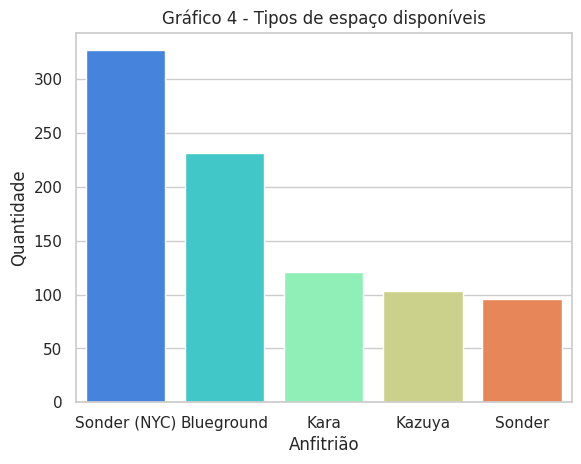

In [ ]:
# Criando um DataFrame com os 5 anfitriãos com maior números de espaços em NYC
top5 = df['host_id'].value_counts().head(5)
top5_df = pd.DataFrame({
    'host_id': top5.index.to_list(),
    'host_name': [df[df['host_id'] == host_id]['host_name'].iloc[0] for host_id in top5.index],
    'count': top5.values
})

# Plotando o gráfico
with sns.axes_style('whitegrid'):
  grafico = sns.barplot(
      data=top5_df,
      x='host_name',
      y='count',
      palette='rainbow')
  grafico.set(title='Gráfico 4 - Tipos de espaço disponíveis',
                xlabel='Anfitrião',
                ylabel='Quantidade')

É possível ver uma ampla margem de vantagem com o anfitrião *Sonder (NYC)* e *Blueground*. Essas são empresas especializadas em alugar espaços em aplicativos.

source: [Blueground](https://www.theblueground.com/)
        [Sonder](https://www.sonder.com/about)

####2.3.5 Geolocalização dos espaços

O [GeoPandas](https://geopandas.org/) é uma biblioteca em Python para análise e manipulação de dados geoespaciais, integrando funcionalidades do Pandas com capacidades geoespaciais. Ele permite carregar, visualizar e analisar dados espaciais, como arquivos shapefiles, de forma simples e eficiente.

Os arquivos shapefiles são amplamente utilizados para representar informações geográficas. Uma fonte confiável para obter arquivos shapefiles é o [site oficial da prefeitura de Nova York](https://www.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page), que oferece uma variedade de dados geoespaciais detalhados sobre a cidade. Os arquivos shapefiles disponíveis podem ser facilmente utilizados com o GeoPandas para análises e visualizações geoespaciais.


In [ ]:
nyc_map = geopandas.read_file("/content/nyc.shp")

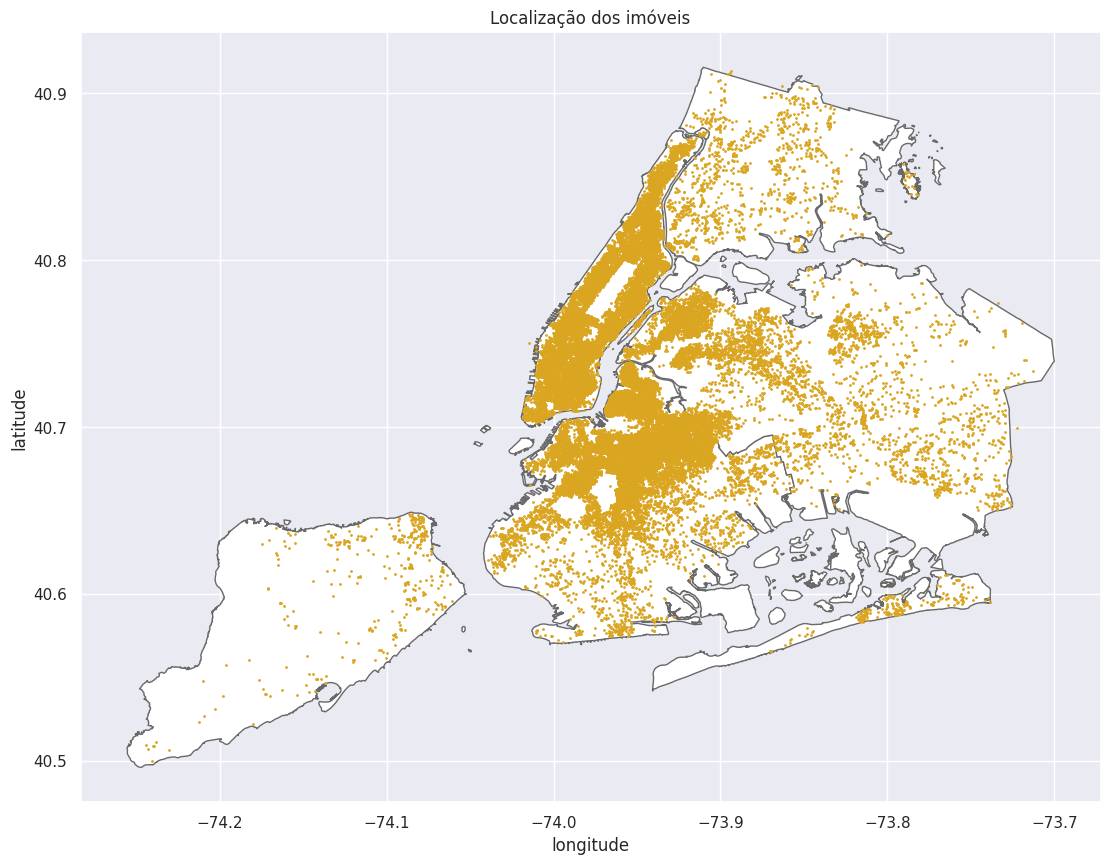

In [ ]:

fig, ax = plt.subplots(figsize=(15, 10))
nyc_map.plot(ax=ax, color='white', edgecolor='dimgrey')
df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', color='goldenrod', s=1)
plt.title('Localização dos imóveis')
plt.show()


Aproveitando, faremos uma análise visual sobre os preços por região, no entanto antes precisamos remover *outliers* que descaracterizem o mapa.

In [ ]:
# Finding the price outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing the price outliers and creating a new df
clean_df = df[df['price'] >= lower_bound]
clean_df = clean_df[clean_df['price'] <= upper_bound]


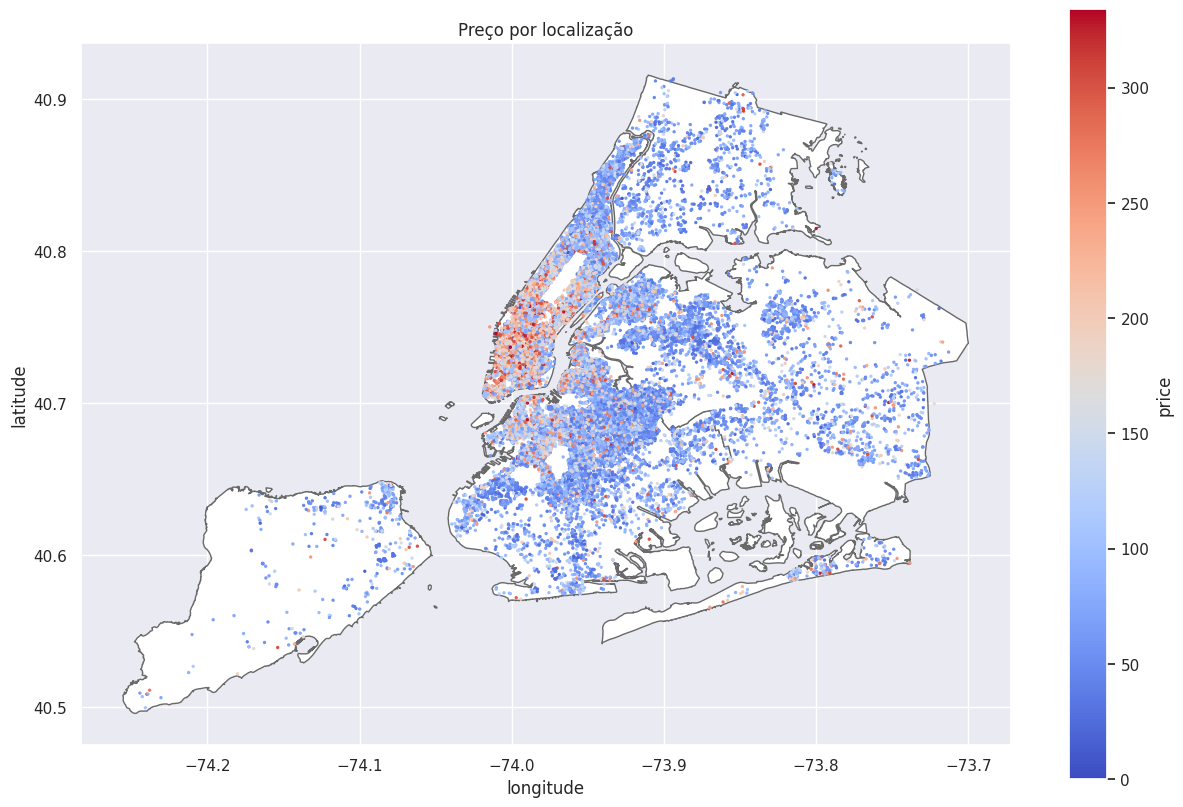

In [ ]:
    # prompt: Crie um mapa usando nyc_map e plote as coordenadas de cada propriedade com um mapa de calor para o preço dos alugueis

fig, ax = plt.subplots(figsize=(15, 10))
nyc_map.plot(ax=ax, color='white', edgecolor='dimgrey')
clean_df.plot(ax=ax, kind='scatter', x='longitude', y='latitude', c='price', cmap='coolwarm', s=2)
plt.title('Preço por localização')
plt.show()


Podemos comparar com o mapa das áreas de Nova York:

>![World Map](https://www.worldatlas.com/r/w768/upload/c6/23/73/shutterstock-152208935.jpg)

Agora é possível observar com clareza que os maiores preços se extendem pela ilha de *Manhattan* e o norte do *Brooklin*.

###**2.4 Correlação dos dados**

[Coeficiente de correlação de Pearson](http://www5.eesc.usp.br/saate/index.php/saate/Indicar-a-T%C3%A9cnica/Associar/2.-%C3%81rvore-de-decis%C3%A3o/Gloss%C3%A1rio/Coeficiente-de-correla%C3%A7%C3%A3o-de-Pearson) é uma medida estatística que avalia a força e a direção de uma relação linear entre duas variáveis contínuas. Ela é amplamente utilizada em estatística e análise de dados para quantificar o grau de associação entre dois conjuntos de dados. O coeficiente de correlação de Pearson é representado pelo símbolo "r" e varia de -1 a +1.

A fórmula da correlação de Pearson é:

$$ r = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2} \sum{(Y_i - \bar{Y})^2}}} $$

Onde:
- $X_i$ e $Y_i$ são os valores individuais das duas variáveis.
- $\bar{X}$ e $\bar{Y}$ são as médias das duas variáveis, respectivamente.

A interpretação do coeficiente de correlação de Pearson é a seguinte:

- $r = 1$: Correlação perfeita positiva (quando uma variável aumenta, a outra também aumenta proporcionalmente).
- $r = -1$: Correlação perfeita negativa (quando uma variável aumenta, a outra diminui proporcionalmente).
- $r = 0$: Ausência de correlação linear.

Apesar de sua ampla aceitação, é importante mencionar que o coeficiente de correlação de Pearson mede apenas relações lineares entre variáveis e é sensível à *outliers*. Ele também não implica causalidade, podendo haver outros fatores que falsamente apontem correlação, requerendo assim interpretação cuidadosa considerando suas limitações.

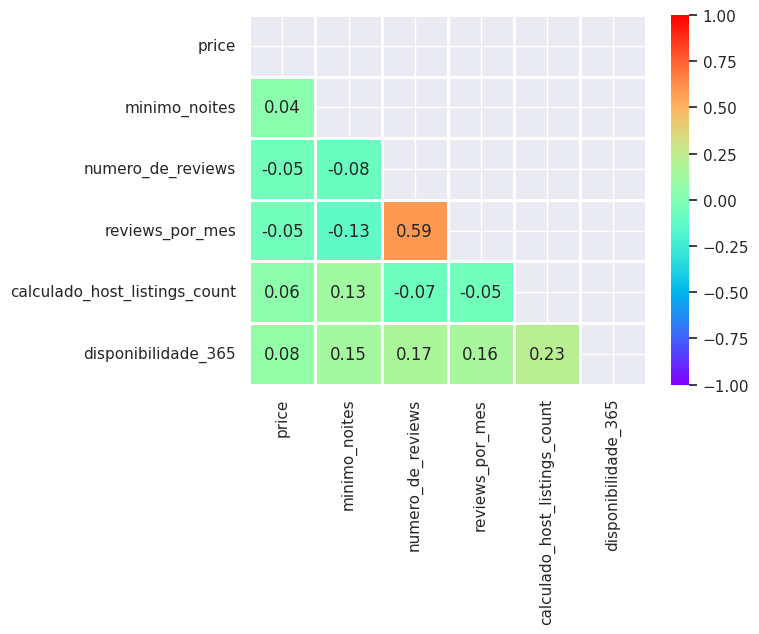

In [ ]:
corr_df = num_data_df.corr(method='pearson', numeric_only=True)

# Criando um numpy array identico (like) a corr_df e preenchido com zeros, ele será usado para eliminar a parte triangular superio da matriz de correlação.
mask = np.zeros_like(corr_df)

# Função do pacote NumPy que dado um array ou matriz (quadrada), seleciona a parte triângular superior.
mask[np.triu_indices_from(mask)] = True

# Gerando gráfico
sns.heatmap(corr_df, cmap='rainbow', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2, annot=True, fmt=".2f")
plt.xticks(rotation=90)
plt.show()

Analisando a matriz de correlação, é possível notar que os dados não tem uma correlação clara, somente os dados sobre *review* tem uma fraca correlação. Isso irá dificultar o processo de predição.

### 2.5 Hipóteses


* A ilha no *Queens*, parte voltada para o oceano atlântico, tem poucas opções do concorrente e pelo gráfico de calor é possível notar que o custo da estádia lá é maior. Oferecer um espaço nessa localização pode ser uma boa escolha para ter um retorno maior.

* Como tem acontecido durante as últimas décadas a cidade de Nova York tem se expandido, assim como tem se popularizado o uso de aplicativos como Airbnb. Com isso em mente, um investimento à longo prazo na ilha *State Island* é uma boa opção pois os preços de imóveis nessa região é menor.

* Disponibilizar uma experiência diferente tem sido uma ferramenta para alavancar os aluguéis de imóveis  por aplicativo. A ilha *Roosevelt* conta com prédios domiciliares e é já é considerado uma experiência interessante só por sua localização entre *Manhattan* e o *Queens* e no meio do rio *Hudson*.

* A área do *Bronx* tem poucas opções de estadia e conta com alguns pontos turísticos interessantes como o estádio dos *Yankees* e o Jardim Botânico de Nova York. Nessa área onde os imóveis são mais baratos, investir em lofts de baixo custo podem ser atrativos para quem quer economizar.

### 2.6 Perguntas importantes

#### 2.6.1 Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Uma busca pelo preço médio de um imóvel na cidade de Nova York, temos o seguinte:

| Área | Preço médio do imóvel |
|---|---|
| Manhattan | \$1,595,000 |
| Brooklyn | \$1,086,000 |
| Queens | \$722,000 |
| Bronx | \$622,000 |
| Staten Island | \$605,000 |

[source](https://www.nyrealestatetrend.com/home-prices-and-property-values-in-new-york/#:~:text=Median%20Home%20Prices%20across%20New%20York%20City's%20Five%20Boroughs&text=Manhattan%20has%20the%20highest%20median,and%20Staten%20Island%20at%20%24605%2C000.)

Logo, a resposta a essa pergunta depende do contexto do investidor, como capital à disposição, tempo de retorno de investimento, preferência de nicho de negócio (albergue, estúdio, apartamentos, casas, luxo). No entanto, podemos generalizar e afirmar com segurança que a área leste do *Queens* tende a ser um bom investimento:

* O preço no *Queens* é 50% menor que em *Brooklin*, 121% menor que em *Manhattan* e apenas 19% mais caro que a distante *Staten Island*.

* A área leste do *Queens* a um raio de 10km do centro de *Manhattan* o que é uma distância aceitável para a maioria dos turistas.

* No *Queens* fica o principal aeroporto da cidade de Nova york e há mais um aeroporto nesta área. Uma boa opção logística para turistas internacionais.

A pesquisa pode ser aprofundada com tempo, comparando os preços dos bairros dentro dessas áreas, a frequência da ocupação (disponibilidade anual), custos de mantenimento e impostos, etc.

#### 2.6.2 O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Vamos primeiro analisar a disponibilidade:

In [ ]:
df['disponibilidade_365'].describe()

count    48857.000000
mean       112.796263
std        131.607363
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: disponibilidade_365, dtype: float64

Uma análise preliminar mostra que:

* A maioria dos valores são baixos, devido ao primeiro quartil e a mínima serem iguais.

* É possível concluir que há distorção nos valores altos, visto a mediana ser um valor significativamente menor em comparação com a máxima.

* O terceiro quartil e a máxima tem uma diferença significante, nos levando a conclusão que há apenas poucos espaços com essa disponibilidade e podemos os considerar como *outliers*.

Abaixo segue a plotagem de um histograma para visualizarmos a distribuição desses dados:

<Axes: >

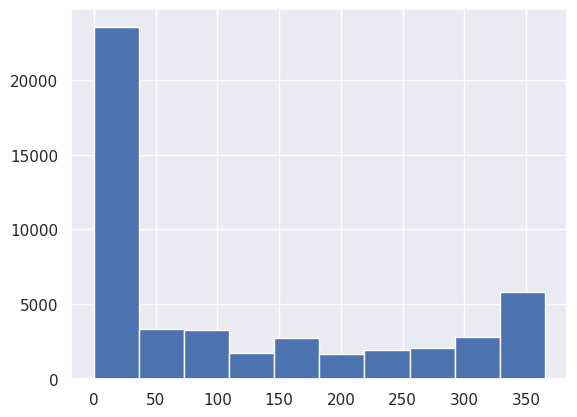

In [ ]:
df['disponibilidade_365'].hist()

A grande maioria dos espaços do concorrente ficam ocupados durante praticamente todo o ano. Para saber se há alguma correlação com o preço, usarei o [Coeficiente de correlação de Pearson](http://www5.eesc.usp.br/saate/index.php/saate/Indicar-a-T%C3%A9cnica/Associar/2.-%C3%81rvore-de-decis%C3%A3o/Gloss%C3%A1rio/Coeficiente-de-correla%C3%A7%C3%A3o-de-Pearson). Abordado anteriormente.

In [ ]:
df['disponibilidade_365'].corr(df['price'])

0.08182078124161064

O resultado de **0,08** indica nenhuma correlação entre os dias disponíveis e o preço da estadia no espaço, o que é natural visto de o preço estar mais relacionado com o tipo de acomodação e as comodidades que ele oferece.

Vamos analisar o número de mínimo de noites agora.

In [ ]:
df['minimo_noites'].describe()

count    48857.000000
mean         7.012567
std         20.019944
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimo_noites, dtype: float64

Já é possível notar uma grande diferença entre os números e o valor máximo. Como estamos interessados em imóveis para aluguel em aplicativo e não um aluguel convencional, vamos limitar o número mínimo de noites para no máximo 1 mês:

<Axes: >

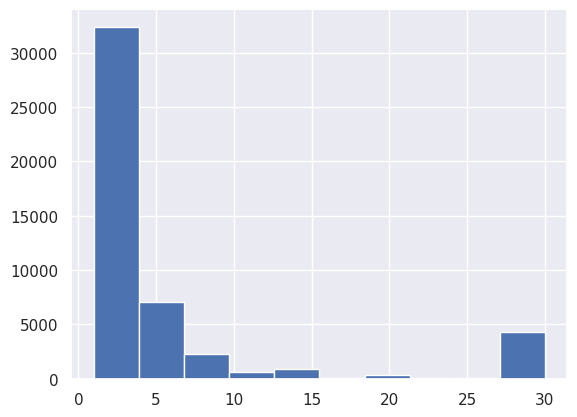

In [ ]:
# Limitando o valor máximo para 30 noites
minimo_noites_df = df[df['minimo_noites'] <= 30]

# Plotagem de um histograma
minimo_noites_df["minimo_noites"].hist()

Vamos verificar sua correlação direta com o preço. Aplicarei o método de correlação de Pearson, usado anteriormente.

In [ ]:
df['minimo_noites'].corr(df['price'])

0.042803842581157596

Temos como resultado **0,04** o que indica **nenhuma correlação**. Já ficou evidênciado na seção **2.4 Correlação dos dados** que nosso conjunto de dados é não correlato, inclusive entre essas 3 variáveis, disponibilidade, mínimo de noite e preço. No entanto, esta análise serve para certificar nosso resultado.

Para finalizar abaixo uma plotagem da relação entre as variáveis:

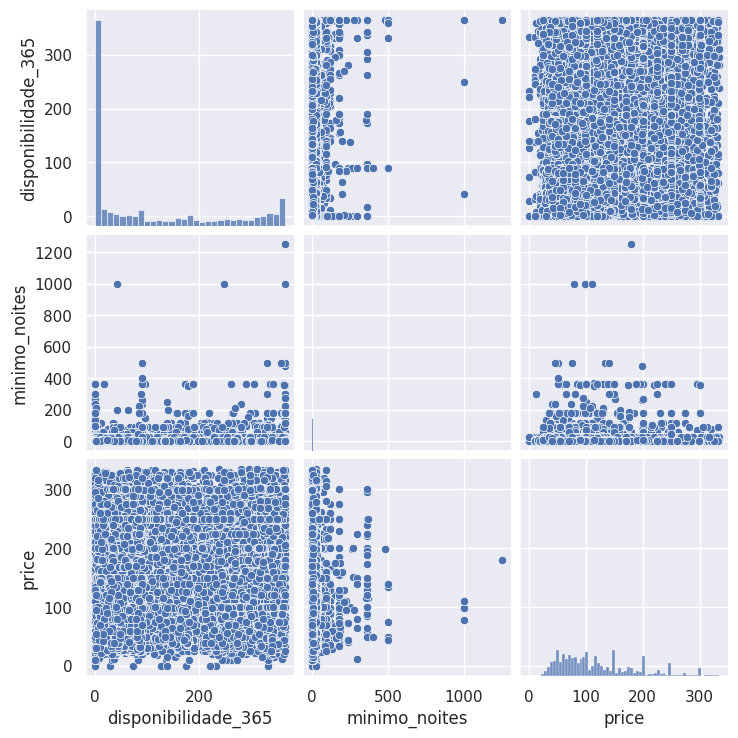

In [ ]:
sns.pairplot(clean_df, vars=['disponibilidade_365', 'minimo_noites', 'price'])
plt.show()


Novamente, note que no gráfico acima não há qualquer referência a algum tipo de correlação. Porém alguns pontos interessantes de salientar são:

* Os espaços que exigem maior número de noites não são necessariamente os mais caros, todos os preços se concentram num limite mínimo de 0 noites.

* Os espaços que exigem maior número de noites são os que possuem maior disponibilidade, provavelmente o anfitrião configurou um limite mínimo de noite absurdo, para que seu imóvel ficasse desocupado e ao mesmo tempo ativo na plataforma.

* O gráfico entre disponibilidade e preço, preenche a plotagem, isso é evidência de que há uma boa distribuição entre opções com disponibilidades diferentes e faixas de preço diferentes entre si.



#### 2.6.3 Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Vamos começar analisando a coluna 'nome'.

In [ ]:
df['nome'].describe()

count              48857
unique             47883
top       Hillside Hotel
freq                  18
Name: nome, dtype: object

Poucos nomes se repetem e **Hillside Hotel** se repete 18 vezes sendo o mais frequente. Para conseguirmos verificar sua correlação com o preço, precisamos tornar essa coluna em uma coluna numérica. Para isso, vamos criar uma coluna com a quantidade de caracteres presentes em cada nome. Irei usar os dados no DataFrame ```clean_df``` para eliminarmos *outliers* que atrapalhem a visualização.

> Para uma avaliação do teor da mensagem, poderíamos fazer uma abordagem utilizando o algoritmo de *Naive Bayes*, Redes Neurais Recorrentes e outros algoritmos de *machine learning*.

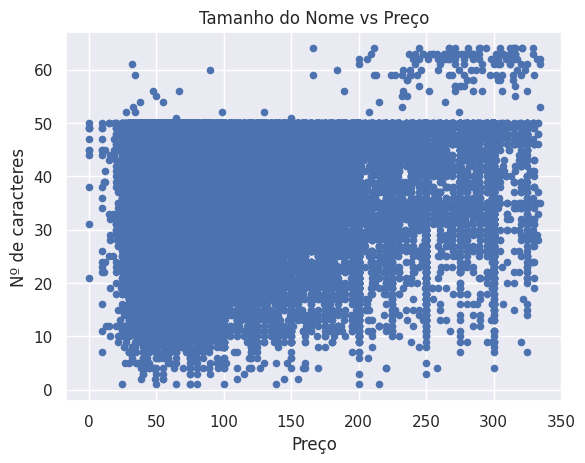

In [ ]:
# Criando coluna com número de caracteres dos nomes
clean_df["tamanho_nome"]=clean_df['nome'].map(str).apply(len)

# Plotando gráfico do tamanho do nome em relação ao preço do espaço.
clean_df[clean_df["tamanho_nome"]<=64].plot.scatter(x="price", y ="tamanho_nome", title="Tamanho do Nome vs Preço")
plt.xlabel("Preço")
plt.ylabel("Nº de caracteres")
plt.show()


# O número de caracteres máximo no gráfico foi arbitrariamente determinado por mim e foi escolhido o dobro do
# limite de caracteres da maior plataforma (32 caracteres no Airbnb).
# source:https://www.airbnb.com.br/resources/hosting-homes/a/guidelines-for-writing-your-listing-title-533

No gráfico acima, é possível ver que há uma tendência de os espaços mais caros não terem nomes curtos. Isso pode ser explicado pelas comodidades e experiências diferenciadas que são promovidas no título e que naturalmente tornam o  preço mais caro.

Há uma evidência linha que limita os valores no eixo Y em 50, provavelmente porquê o limite deveria ser de 50 caracteres quando estes dados foram coletados.

Finalizaremos realizando o coeficiente de correlação de Pearson:

In [ ]:
clean_df["tamanho_nome"].corr(clean_df['price'])

0.08473974153913989

Novamente, o número de coeficiente **0,08** define os dados como não correlativos.

<a id='ml'></a>
## Aprendizado de Máquina

#### **3.1 Feature Engineering**

Vamos usar o DataFrame que não tem *outlier* no valor para melhorar a adaptação do modelo à maior parte dos dados.

In [ ]:
clean_df.reset_index(inplace=True, drop=True)

As colunas categóricas precisam ser processadas para se tornarem numéricas e assim conseguirem ser manuseadas por algoritmos estatísticos.

In [ ]:
# Transformando as colunas categoricas com o método get_dumies
categorical_features = pd.get_dummies(clean_df, columns=['bairro_group', 'room_type'], dtype=int)

In [ ]:
# Transformando os dados categoricos em identificadores numéricos (Usado quando há muitos valores distintos)
encoder = LabelEncoder()
categorical_features['bairro'] = encoder.fit_transform(clean_df['bairro'])

In [ ]:
#Criação do DataFrame com as features preparadas para treino
features_df = categorical_features.drop(['id', 'host_id', 'nome', 'host_name', 'ultima_review'], axis=1)

In [ ]:
features_df.head()

,bairro,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,tamanho_nome,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,126,40.75362,-73.98377,225,1,45,0.38,2,355,21,0,0,1,0,0,1,0,0
1,93,40.80902,-73.94190,150,3,0,0.00,1,365,35,0,0,1,0,0,0,1,0
2,41,40.68514,-73.95976,89,1,270,4.64,1,194,31,0,1,0,0,0,1,0,0
3,61,40.79851,-73.94399,80,10,9,0.10,1,0,48,0,0,1,0,0,1,0,0
4,136,40.74767,-73.97500,200,3,74,0.59,1,129,41,0,0,1,0,0,1,0,0


### 3.2 **Machine Learning**

Inicialmente, vamos separar os dados em conjuntos de treino e teste em uma proporção de 75% e 25%, respectivamente. Em seguida, vamos normalizar os dados usando o StandardScaler.

O StandardScaler é uma técnica de pré-processamento que padroniza os recursos removendo a média e escalonando para a unidade de variância. Isso garante que os recursos tenham a mesma escala, o que é importante para muitos algoritmos de aprendizado de máquina, especialmente aqueles que são sensíveis à escala dos recursos.

In [ ]:
x = features_df.drop('price', axis=1)
y = features_df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

In [ ]:
scaler = StandardScaler()

scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Usaremos dois tipos de algoritmos de regressão: regressão linear e regressão de árvore aleatória.

- Regressão Linear: Um modelo linear que tenta modelar a relação entre uma variável dependente e uma ou mais variáveis independentes, assumindo uma relação linear entre elas. É simples, fácil de interpretar e rápido de treinar. No entanto, pode não capturar relações não lineares nos dados.

- Regressão de Árvore Aleatória: Um modelo baseado em árvores de decisão, que funciona criando várias árvores de decisão durante o treinamento e combinando suas previsões para obter uma previsão final. É flexível, capaz de capturar relações não lineares e robusto a outliers e dados não padronizados.

#### 3.2.1 Regressão Linear

In [ ]:
# prompt: Crie uma regressão linear
lr_model= LinearRegression()
lr_model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predição
lr_predicted = lr_model.predict(x_test_scaled)

In [ ]:
# DataFrame com os resultados previstos vs reais
comparinson_df = pd.DataFrame({'Real': y_test, 'Predicted': lr_predicted.ravel()})
comparinson_df

,Real,Predicted
23691,71,141.004949
35121,120,153.211258
28660,60,82.187987
22119,43,57.453835
45204,170,183.132357
...,...,...
38994,53,91.815545
37501,61,129.189389
11731,150,172.677223
35017,181,138.030390


In [ ]:
# Avaliando performance

#Criando DataFrame com métricas
rl_evaluation_df = pd.DataFrame(columns = ['Coef. de determinação', 'Erro absoluto médio'])

# Calculando métricas
rscore = r2_score(y_test, lr_predicted) # R-Quadrado (Quanto mais próx de 1 melhor)
mae = mean_absolute_error(y_test, lr_predicted) # Erro absoluto médio

# Adicionando resultados
rl_evaluation_df.loc[0] = [rscore, mae]

# Exibindo
rl_evaluation_df.T

,0
Coef. de determinação,0.485129
Erro absoluto médio,36.221037




*  Coeficiente de Determinação (R²): O valor é aproximadamente 0.485, o que significa que cerca de 48.51% da variabilidade na variável dependente é explicada pelos regressores no modelo. Um R² maior indicaria um ajuste melhor do modelo aos dados.

* Erro Absoluto Médio (MAE): O valor é de aproximadamente 36.22. Isso indica que, em média, as previsões do modelo têm um desvio absoluto de cerca de 36.22 unidades em relação aos valores reais. O MAE é uma medida da magnitude média dos erros entre as previsões e os valores reais, sendo menos sensível a outliers do que o Erro Quadrático Médio (MSE) e o Erro Quadrático Médio (RMSE).



Infelizmente, o modelo de Regressão Linear não teve uma boa performance, como já prevíamos em vista do formato dos dados. Uma técnica que vale a pena tentar é a Regressão de Floresta Aleatória.

#### 3.2.2 Regressão de Floresta Aleatória

In [ ]:
# prompt: Crie uma regressão linear
rfr_model= RandomForestRegressor()
rfr_model.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
# Predição
rfr_predicted = rfr_model.predict(x_test_scaled)

In [ ]:
# DataFrame com os resultados previstos vs reais
comparinson_df = pd.DataFrame({'Real': y_test, 'Predicted': rfr_predicted.ravel()})
comparinson_df

,Real,Predicted
23691,71,156.90
35121,120,187.37
28660,60,80.24
22119,43,56.27
45204,170,204.88
...,...,...
38994,53,54.29
37501,61,126.75
11731,150,157.95
35017,181,143.04


In [ ]:
# Avaliando performance

#Criando DataFrame com métricas
rfr_evaluation_df = pd.DataFrame(columns = ['Coef. de determinação', 'Erro absoluto médio'])

# Calculando métricas
rscore = r2_score(y_test, rfr_predicted) # R-Quadrado (Quanto mais próx de 1 melhor)
mae = mean_absolute_error(y_test, rfr_predicted) # Erro absoluto médio

# Adicionando resultados
rfr_evaluation_df.loc[0] = [rscore, mae]

# Exibindo
rfr_evaluation_df.T

,0
Coef. de determinação,0.572599
Erro absoluto médio,32.098747


* R² (Coeficiente de Determinação): Cerca de 57.21% da variabilidade na variável dependente é explicada pelo modelo.

* MAE (Erro Absoluto Médio): Em média, os valores previstos desviam aproximadamente 32.09 unidades dos valores reais.


### 3.3 Predição específica (desafio)

Usaremos o modelo treinado para predizer um valor sugerido para um imóvel com os dados e localização conforme a tabela abaixo:

| Atributo                        | Valor                |
|---------------------------------|----------------------|
| id                              | 2595                 |
| nome                            | Skylit Midtown Castle|
| host_id                         | 2845                 |
| host_name                       | Jennifer             |
| bairro_group                    | Manhattan            |
| bairro                          | Midtown              |
| latitude                        | 40.75362             |
| longitude                       | -73.98377            |
| room_type                       | Entire home/apt      |
| price                           | 225                  |
| minimo_noites                   | 1                    |
| numero_de_reviews               | 45                   |
| ultima_review                   | 2019-05-21           |
| reviews_por_mes                 | 0.38                 |
| calculado_host_listings_count   | 2                    |
| disponibilidade_365             | 355                  |

Nosso modelo funciona com as seguintes features:

In [ ]:
print(features_df.columns.values)

['bairro' 'latitude' 'longitude' 'price' 'minimo_noites'
 'numero_de_reviews' 'reviews_por_mes' 'calculado_host_listings_count'
 'disponibilidade_365' 'tamanho_nome' 'bairro_group_Bronx'
 'bairro_group_Brooklyn' 'bairro_group_Manhattan' 'bairro_group_Queens'
 'bairro_group_Staten Island' 'room_type_Entire home/apt'
 'room_type_Private room' 'room_type_Shared room']


Abaixo a montagem da variável que irá conter os dados.

In [ ]:
imovel_df = pd.DataFrame(columns=features_df.columns.values)

bairro_encoding = encoder.transform(['Midtown'])[0]

imovel = {'bairro': bairro_encoding,
          'latitude': 40.75362,
          'longitude': -73.98377,
          'price': 225,
          'minimo_noites': 1,
          'numero_de_reviews': 45,
          'reviews_por_mes': 0.38,
          'calculado_host_listings_count': 2,
          'disponibilidade_365': 355,
          'tamanho_nome': len('Skylit Midtown Castle'),
          'bairro_group_Bronx': 0,
          'bairro_group_Brooklyn': 0,
          'bairro_group_Manhattan': 1,
          'bairro_group_Queens': 0,
          'bairro_group_Staten Island': 0,
          'room_type_Entire home/apt': 1,
          'room_type_Private room': 0,
          'room_type_Shared room': 0
          }

imovel_df = imovel_df.append(imovel, ignore_index=True)

imovel_df.head()

,bairro,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,tamanho_nome,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,126.0,40.75362,-73.98377,225.0,1.0,45.0,0.38,2.0,355.0,21.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Com o dados pronto, é possível fazer a predição utilizando ambos os modelos:

In [ ]:
# Predição com regressão linear
lr_predicted = lr_model.predict(imovel_df.drop('price', axis=1))

# Predição com regressão de arvore aleatória
rfr_predicted = rfr_model.predict(imovel_df.drop('price', axis=1))

# DataFrame com os resultados previstos vs real
comparinson_df = pd.DataFrame({'Real': imovel_df.price, 'LR Predicted': lr_predicted, 'RFR Predicted': rfr_predicted})
comparinson_df

,Real,LR Predicted,RFR Predicted
0,225.0,3916.68404,147.29


O preço previsto é **R$ 168,37**, pelo modelo de regressão de árvores aleatórias.

<a id='conclusion'></a>
## Conclusão

A análise dos dados nos deu importantes insights como a tabela de dados populares:

>| Mais popular | Valor |
|---|---|
| Anúncio | Hillside Hotel |
| Anfitrião | Michael |
| Bairro | Manhattan |
| Área | Williamsburg |
| Tipo de quarto | Casa/apartamento inteiro |
| Comodidadeses | Wifi, cozinha, itens essenciais, aquecimento, ar condicionado |



*   O preço mediano é de $106, menor que a média aritmética, sugerindo que os preços tendem a ser em sua maioria numa faixa de preço mais baixa.

*  Analisamos um mapa de calor plotado em cima dos dados cartográficos oficiais da cidade de Nova York, que nos ajudaram a concluir que a região leste do *Queens* é uma boa opção de investimento.

*  Testamos dois modelos de machine learning, que não performaram bem, e nossa análise revelou que isso é consequência da baixa correlação entre os dados.

In [ ]:
# Exportando modelos em pkl
import pickle

# Save the model to a file
with open('fernandocarneiro_rfr_model.pkl', 'wb') as file:
    pickle.dump(rfr_model, file)

with open('fernandocarneiro_lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

In [ ]:
# Salvando requisitos do Kernel do
!pip freeze > requirements.txt